# **UAS Pemecahan Kasus Machine Learning** 

> ## K-Means Image Clustering

### Muhammad Kanzoon Mekhfy Asyraq Rekza
### 19/442479/PA/19228


# **The Code** 

## **Import Libraries and Image**

In [80]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Change filepath to your desired image
filepath = 'image.jpg'
img = cv.imread(filepath)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB) # RGB image
imgbnw = cv.cvtColor(img, cv.COLOR_RGB2GRAY) # Grayscale image

## **Show Raw And Grayscale Image and Histograms**

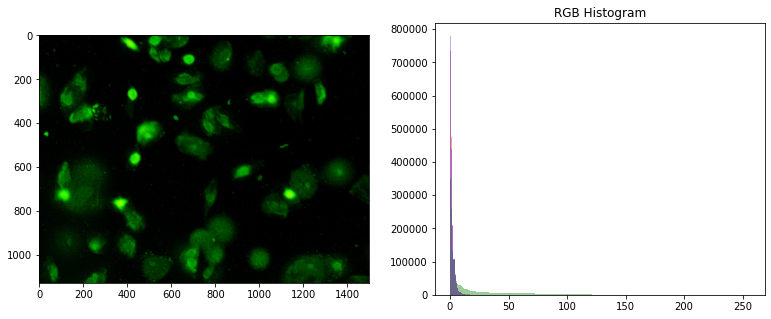

In [81]:
plt.figure(figsize=(13,5))
plt.title('RGB Image')
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.title('RGB Histogram')
plt.hist(img[:,:,0].ravel(), bins=256, range=(0, 256), color='red', alpha = 0.4)
plt.hist(img[:,:,1].ravel(), bins=256, range=(0, 256), color='green', alpha = 0.4)
plt.hist(img[:,:,2].ravel(), bins=256, range=(0, 256), color='blue', alpha = 0.3)
plt.show()

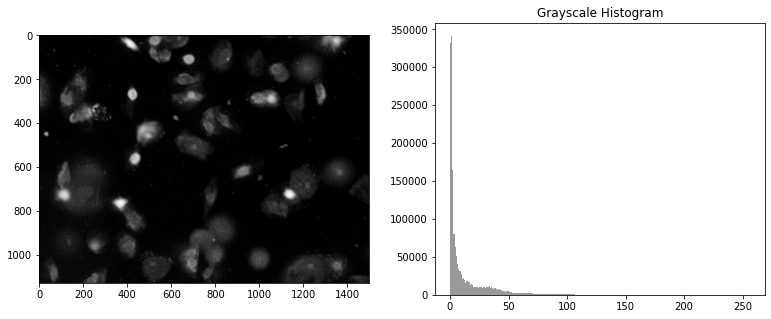

In [82]:
plt.figure(figsize=(13,5))
plt.title('Grayscale Image')
plt.subplot(121)
plt.imshow(imgbnw, cmap='gray')
plt.subplot(122)
plt.title('Grayscale Histogram')
plt.hist(imgbnw.ravel(), bins=256, range=(0, 256), color='black', alpha=0.4)
plt.show()

## **Non Uniform Quantization Algorithm**

In [83]:


def meanQuan(K):
    # Make new sorted array of imgbnw 
    imgsorted = imgbnw.copy()
    imgsorted = imgsorted.ravel()
    imgsorted.sort()

    # Make new empty list for indexing, with start and end
    arrindex = []
    arrindex.append([])
    arrindex[-1].append(0)
    arrindex[-1].append(0)
    arrindex.append([])
    arrindex[-1].append(len(imgsorted))
    arrindex[-1].append(256)

    # Fill array arrindex based on image data and K
    for i in range(int(np.log2(K))):
        length = len(arrindex)
        for i in range(length-1):
            # Get the partial list to work with
            partiallst = imgsorted[int(arrindex[i][0]):int(arrindex[i+1][0])]
            # Get index of last mean value in list. Return index+1 of the value
            where = np.where(imgsorted == int(partiallst.mean()))[0][-1]+1
            # Insert index and value of mean to arrindex
            arrindex.append([])
            arrindex[-1].append(where)
            arrindex[-1].append(int(partiallst.mean()))
        arrindex.sort()

    # Get mean value for each part of the graph
    for i in range (len(arrindex)-1):
        partiallst = imgsorted[int(arrindex[i][0]):int(arrindex[i+1][0])]
        arrindex[i+1].append(int(partiallst.mean()))

    # Create copy of imgbnw
    imgbnwquantized = imgbnw.copy()

    # Structure:
    # 
    # array.shape[rows][column]
    # 
    #   -----> column
    #  |
    #  |
    #  v
    # rows
    rows = imgbnwquantized.shape[0]
    cols = imgbnwquantized.shape[1]

    for i in range (rows):
        for j in range (cols):
            # imgbnwquantized[i][j] = 125
            for k in range (len(arrindex)-1):
                if(imgbnwquantized[i][j] > arrindex[k][1]) and (imgbnwquantized[i][j] <= arrindex[k+1][1]):
                    imgbnwquantized[i][j] = arrindex[k+1][2]
                    break
                else:
                    continue 

    return imgbnwquantized

def KMeans(K):
    imgtomess = imgbnw.copy()
    Z = imgtomess.reshape((-1,3))
    # convert to np.float32
    Z = np.float32(Z)  

    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    attempts=10

    ret,label,center = cv.kmeans(Z,K,None,criteria,attempts,cv.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((imgtomess.shape))

    return res2

def showQuan(manualquan, functquan):
    plt.figure(figsize=(12,10))
    plt.title('Grayscale Image')
    plt.subplot(221)
    plt.title("Original")
    plt.imshow(img)
    plt.axis('off')
    plt.subplot(223)
    plt.title("Manual Mean Quantization")
    plt.imshow(manualquan, cmap='gray')
    plt.axis('off')
    plt.subplot(224)
    plt.title("KMeans")
    plt.imshow(functquan, cmap='gray')
    plt.axis('off')
    plt.show()

def meanQuantization(K):
    showQuan(meanQuan(K), KMeans(K))


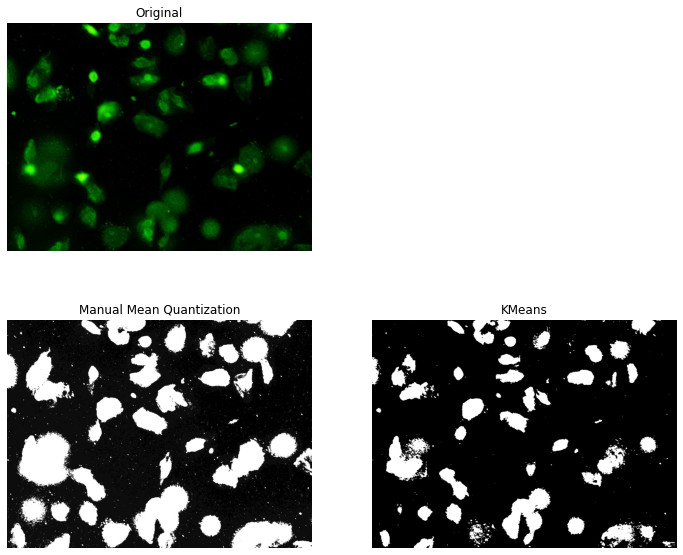

In [84]:
meanQuantization(2)